### Student Information
Name: David-Oliver Matzka

Student ID: J144030004

GitHub ID:  71775245

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

# Phase 1
- Load data
- Minimal cleaning/tokenization
- EDA (labels, lengths)
- Bag-of-Words (CountVectorizer)
- Top tokens overall and per label

In [19]:
### Begin Assignment Here

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import math
import PAMI
import umap
from sklearn.feature_extraction.text import CountVectorizer
import nltk
nltk.download('punkt') # download the NLTK datasets
nltk.download('stopwords') # download the NLTK stopwords

sentiments = pd.read_csv('newdataset/Reddit-stock-sentiment.csv')
sentiments.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dmatz\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dmatz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0
4,comment,2025-04-11 14:48:05,mmkl6bw,StockMarket,The Trump administration is begging Xi Jinping...,Just-Big6411,https://edition.cnn.com/2025/04/10/politics/tr...,1,NaN,NaN,He didn’t say thank you.,0.000000,0.000000,0.0,[],-1.0


In [20]:
sentiments = sentiments[['type', 'title', 'author', 'text','sentiment', 'label']]
sentiments.dropna(inplace=True)

len(sentiments)

print(sentiments['type'][0:10])

sentiments[sentiments['type'] == 'comment']

# check missing values
sentiments.isnull()

0    comment
1    comment
2    comment
3       post
4    comment
5    comment
6    comment
7    comment
8    comment
9    comment
Name: type, dtype: object


,type,title,author,text,sentiment,label
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
842,False,False,False,False,False,False
843,False,False,False,False,False,False
844,False,False,False,False,False,False
845,False,False,False,False,False,False


In [21]:
import helpers.data_mining_helpers as dmh

dummy_series = pd.Series(["dummy_record", 1], index=["text", "type"])
dummy_series.to_frame().T
# .to_frame() -> Convert Series to DataFrame
# .T          -> Transpose

result_with_series = pd.concat([sentiments[['text','type']], dummy_series.to_frame().T], ignore_index=True)
len(result_with_series)

sentiments.isnull().apply(lambda x: dmh.check_missing_values(x))

,type,title,author,text,sentiment,label
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0,0,0


In [22]:
# Handling Duplicates
sum(sentiments.duplicated())
sum(sentiments.duplicated('text'))
sentiments.drop_duplicates(keep=False, inplace=True) # inplace applies changes directly on our dataframe

In [23]:
# Get a random sample of 150 records
sentiments_sample = sentiments.sample(n=150, random_state=42) #random state
len(sentiments_sample)
sentiments_sample[0:4]

,type,title,author,text,sentiment,label
255,comment,Trump: We Are Doing Really Well On Our Tariff ...,dumberthenhelooks,Mf signs his texts. Good grief,-1.0,-1.0
613,comment,Trump: We Are Doing Really Well On Our Tariff ...,Blattgeist,404 Brain not found. Hm... I get the feeling t...,-1.0,0.0
235,comment,🚨China responds to Trump’s 145% tariff with an...,eagermoron,6969% tariffs or riot.,0.0,0.0
300,comment,Technical Analysis Thread.,saasfin,[/](/),0.0,0.0


In [24]:
# Compare sentiments vs sentiments_sample

# 1) Size
print("Rows: sentiments =", len(sentiments), "| sentiments_sample =", len(sentiments_sample))

# 2) Columns (structure)
print("Columns identical:", list(sentiments.columns) == list(sentiments_sample.columns))

# 3) Index behavior (sample keeps original row indices, order is random)
print("Sample indices subset of sentiments:", set(sentiments_sample.index).issubset(set(sentiments.index)))
print("First 10 indices in sentiments_sample:", list(sentiments_sample.index[:10]))
print("Indices unique (no replacement):", sentiments_sample.index.is_unique)
print(
    "Indices reset to 0..n-1:",
    list(sentiments_sample.index[:5]) == list(range(min(5, len(sentiments_sample))))
)

# 4) Label distribution changes (counts can shift due to random sampling)
if "label" in sentiments.columns:
    print("\nLabel distribution (sentiments):")
    print(sentiments["label"].value_counts())
    print("\nLabel distribution (sentiments_sample):")
    print(sentiments_sample["label"].value_counts())

# 5) Missing values overview (should be similar patterns but on fewer rows)
print("\nMissing values per column (sentiments):")
print(sentiments.isnull().sum())
print("\nMissing values per column (sentiments_sample):")
print(sentiments_sample.isnull().sum())

Rows: sentiments = 813 | sentiments_sample = 150
Columns identical: True
Sample indices subset of sentiments: True
First 10 indices in sentiments_sample: [255, 613, 235, 300, 560, 831, 206, 303, 461, 439]
Indices unique (no replacement): True
Indices reset to 0..n-1: False

Label distribution (sentiments):
label
 0.0    391
-1.0    315
 1.0    107
Name: count, dtype: int64

Label distribution (sentiments_sample):
label
 0.0    72
-1.0    60
 1.0    18
Name: count, dtype: int64

Missing values per column (sentiments):
type         0
title        0
author       0
text         0
sentiment    0
label        0
dtype: int64

Missing values per column (sentiments_sample):
type         0
title        0
author       0
text         0
sentiment    0
label        0
dtype: int64


sentiment
 1.0    315
 0.0    303
-1.0    195
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='sentiment'>

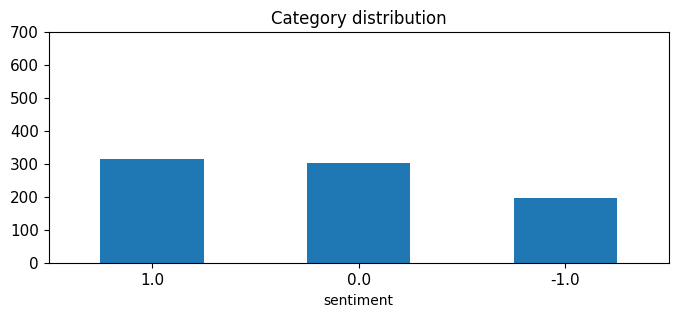

In [25]:
print(sentiments.sentiment.value_counts())

# plot barchart for sentiments
sentiments.sentiment.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, 700],
                                    rot = 0, fontsize = 11, figsize = (8, 3))

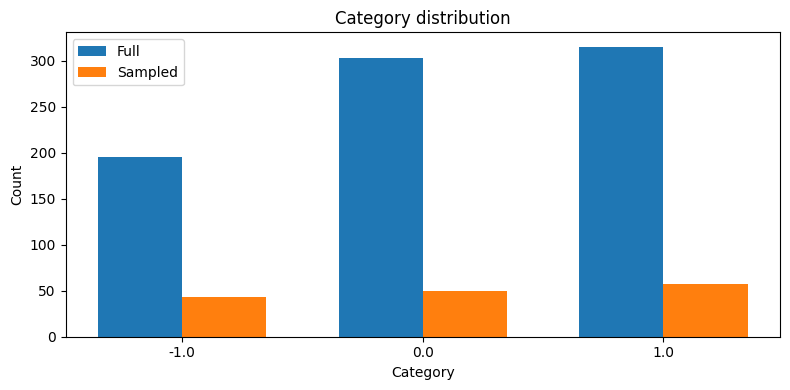

In [46]:
import numpy as np

# Side-by-side comparison of category distributions

# Get value counts for both datasets
counts = sentiments['sentiment'].value_counts().sort_index()
sample_counts = sentiments_sample['sentiment'].value_counts().sort_index()

# Align indices for plotting
categories_sorted = sorted(sentiments['sentiment'].unique())
counts = counts.reindex(categories_sorted, fill_value=0)
sample_counts = sample_counts.reindex(categories_sorted, fill_value=0)


bar_width = 0.35
index = np.arange(len(categories_sorted))

plt.figure(figsize=(8,4))
plt.bar(index, counts, bar_width, label='Full')
plt.bar(index + bar_width, sample_counts, bar_width, label='Sampled')

plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Category distribution')
plt.xticks(index + bar_width / 2, categories_sorted, rotation=0)
plt.legend()
plt.tight_layout()
plt.show()


In [28]:
import nltk
nltk.download("punkt")
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dmatz\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\dmatz\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [29]:
sentiments['unigrams'] = sentiments['text'].apply(lambda x: dmh.tokenize_text(x))

sentiments[0:4]["unigrams"]

sentiments[0:4]

list(sentiments[0:1]['unigrams'])

[['Calls', 'on', 'retards']]

In [47]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(sentiments.text) #learn the vocabulary and return document-term matrix
print(X_counts[3])

  (np.int32(0), np.int32(2682))	2
  (np.int32(0), np.int32(2005))	1
  (np.int32(0), np.int32(2286))	1
  (np.int32(0), np.int32(175))	4
  (np.int32(0), np.int32(2138))	2
  (np.int32(0), np.int32(3817))	8
  (np.int32(0), np.int32(2663))	4
  (np.int32(0), np.int32(4112))	3
  (np.int32(0), np.int32(2398))	3
  (np.int32(0), np.int32(3792))	3
  (np.int32(0), np.int32(2007))	3
  (np.int32(0), np.int32(2126))	3
  (np.int32(0), np.int32(3235))	1
  (np.int32(0), np.int32(4157))	2
  (np.int32(0), np.int32(3285))	1
  (np.int32(0), np.int32(3818))	2
  (np.int32(0), np.int32(851))	2
  (np.int32(0), np.int32(4238))	3
  (np.int32(0), np.int32(3409))	3
  (np.int32(0), np.int32(3898))	4
  (np.int32(0), np.int32(1818))	1
  (np.int32(0), np.int32(195))	1
  (np.int32(0), np.int32(4034))	1
  (np.int32(0), np.int32(557))	1
  (np.int32(0), np.int32(18))	3
  :	:
  (np.int32(0), np.int32(1058))	1
  (np.int32(0), np.int32(1293))	1
  (np.int32(0), np.int32(945))	1
  (np.int32(0), np.int32(3879))	2
  (np.int32(0),

In [31]:
count_vect.get_feature_names_out()[421]

'autocracy'

In [32]:
count_vect.get_feature_names_out()[1001]

'creating'

In [33]:
analyze = count_vect.build_analyzer()
analyze(sentiments.text[3])

['vision',
 'marine',
 'technologies',
 'inc',
 'is',
 'rewriting',
 'the',
 'watercraft',
 'rulebook',
 'their',
 'collaboration',
 'with',
 'shaun',
 'torrente',
 'has',
 'achieved',
 'the',
 'unthinkable',
 'blazing',
 '116',
 'mph',
 'on',
 'water',
 'this',
 'isn',
 'just',
 'about',
 'speed',
 'it',
 'about',
 'propelling',
 'electric',
 'boating',
 'into',
 'new',
 'era',
 'their',
 'cutting',
 'edge',
 'technology',
 'combined',
 'with',
 'torrente',
 'skill',
 'is',
 'making',
 'waves',
 'that',
 'll',
 'ripple',
 'for',
 'generations',
 'highlight',
 'main',
 'points',
 'vision',
 'marine',
 'technologies',
 'inc',
 'achieves',
 'record',
 'breaking',
 '116',
 'mph',
 'speed',
 'on',
 'water',
 'with',
 'shaun',
 'torrente',
 'the',
 'feat',
 'highlights',
 'the',
 'power',
 'of',
 'electric',
 'boating',
 'and',
 'pushes',
 'the',
 'limits',
 'of',
 'innovation',
 'partners',
 'like',
 'octillion',
 'power',
 'systems',
 'and',
 'danfoss',
 'editron',
 'contribute',
 'to',
 

In [ ]:
X_counts.shape
count_vect.get_feature_names_out()[0:10]
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [35]:
count_vect.get_feature_names_out()[0:1]

array(['00'], dtype=object)

In [36]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]
plot_y = ["doc_"+ str(i) for i in list(sentiments.index)[0:20]]
plot_z = X_counts[0:20, 0:20].toarray() #X_counts[how many documents, how many terms]
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

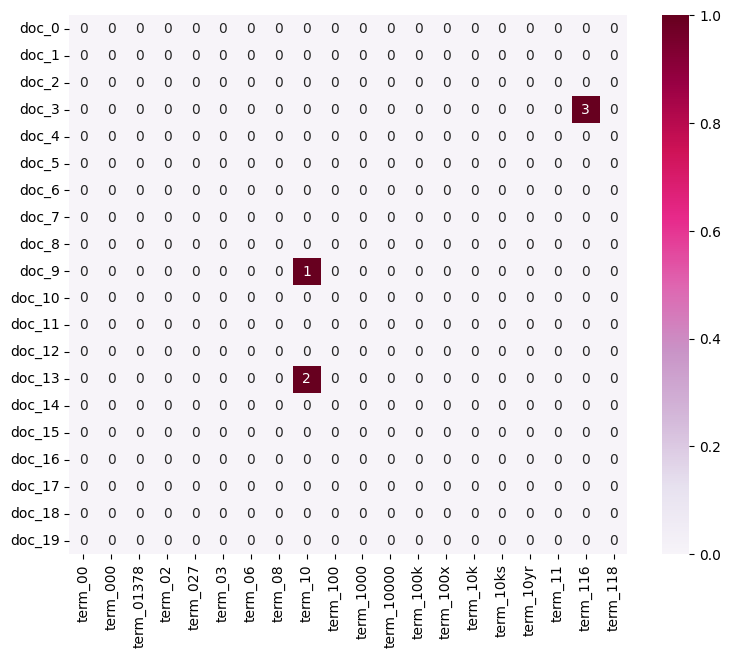

In [37]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

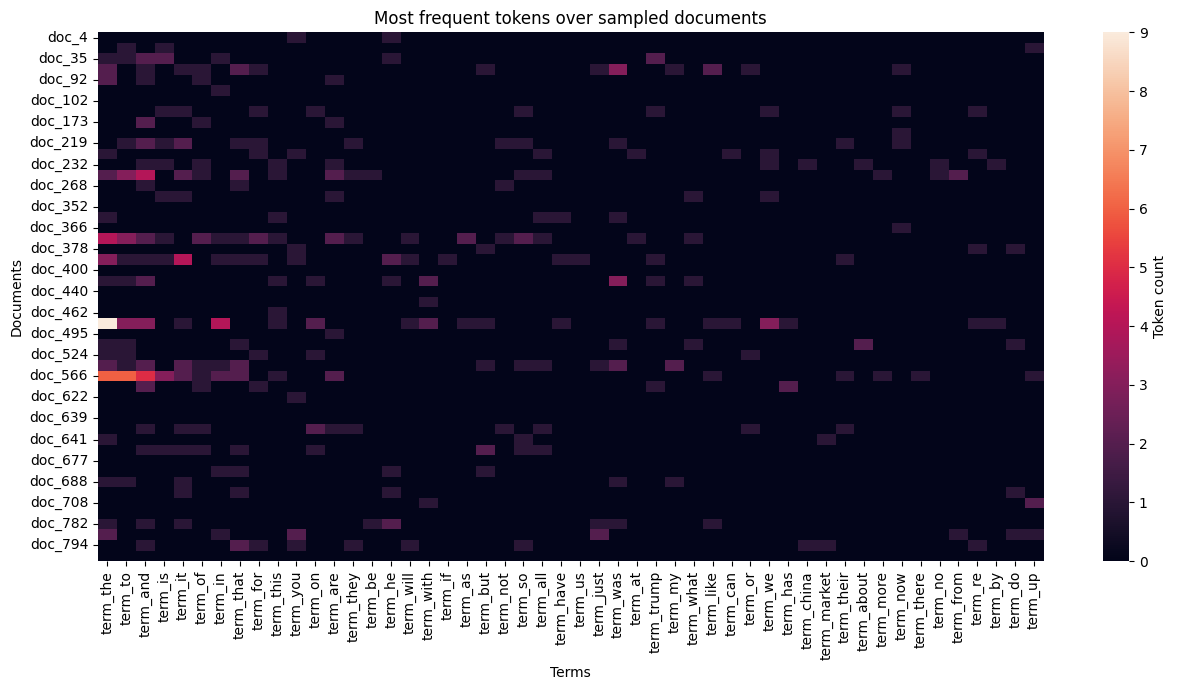

In [38]:
# Highlight frequent terms across a reproducible document sample
feature_names = count_vect.get_feature_names_out()
term_totals = pd.Series(np.asarray(X_counts.sum(axis=0)).ravel(), index=feature_names)
top_terms = term_totals.nlargest(50)

rng = np.random.default_rng(7)
doc_count = min(50, X_counts.shape[0])
doc_ids = np.sort(rng.choice(X_counts.shape[0], size=doc_count, replace=False))

top_columns = [count_vect.vocabulary_[term] for term in top_terms.index]
subset_matrix = X_counts[doc_ids][:, top_columns].toarray()

doc_labels = [f"doc_{i}" for i in doc_ids]
term_labels = [f"term_{token}" for token in top_terms.index]

heatmap_df = pd.DataFrame(subset_matrix, index=doc_labels, columns=term_labels)

plt.figure(figsize=(13, 7))
sns.heatmap(heatmap_df, cmap="rocket", cbar_kws={"label": "Token count"})
plt.title("Most frequent tokens over sampled documents")
plt.xlabel("Terms")
plt.ylabel("Documents")
plt.tight_layout()
plt.show()


C:\Users\dmatz\AppData\Local\Temp\ipykernel_2628\1705459338.py:13: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



[Text(0, 0, '00'),
 Text(1, 0, '000'),
 Text(2, 0, '01378'),
 Text(3, 0, '02'),
 Text(4, 0, '027'),
 Text(5, 0, '03'),
 Text(6, 0, '06'),
 Text(7, 0, '08'),
 Text(8, 0, '10'),
 Text(9, 0, '100'),
 Text(10, 0, '1000'),
 Text(11, 0, '10000'),
 Text(12, 0, '100k'),
 Text(13, 0, '100x'),
 Text(14, 0, '10k'),
 Text(15, 0, '10ks'),
 Text(16, 0, '10yr'),
 Text(17, 0, '11'),
 Text(18, 0, '116'),
 Text(19, 0, '118'),
 Text(20, 0, '12'),
 Text(21, 0, '1242'),
 Text(22, 0, '125'),
 Text(23, 0, '12855584'),
 Text(24, 0, '13'),
 Text(25, 0, '14'),
 Text(26, 0, '140'),
 Text(27, 0, '145'),
 Text(28, 0, '14th'),
 Text(29, 0, '15'),
 Text(30, 0, '150'),
 Text(31, 0, '153'),
 Text(32, 0, '15m'),
 Text(33, 0, '16'),
 Text(34, 0, '160'),
 Text(35, 0, '17'),
 Text(36, 0, '1700'),
 Text(37, 0, '1728'),
 Text(38, 0, '17th'),
 Text(39, 0, '18'),
 Text(40, 0, '186'),
 Text(41, 0, '18630'),
 Text(42, 0, '1870'),
 Text(43, 0, '1934'),
 Text(44, 0, '1945'),
 Text(45, 0, '1947'),
 Text(46, 0, '1953'),
 Text(47, 0

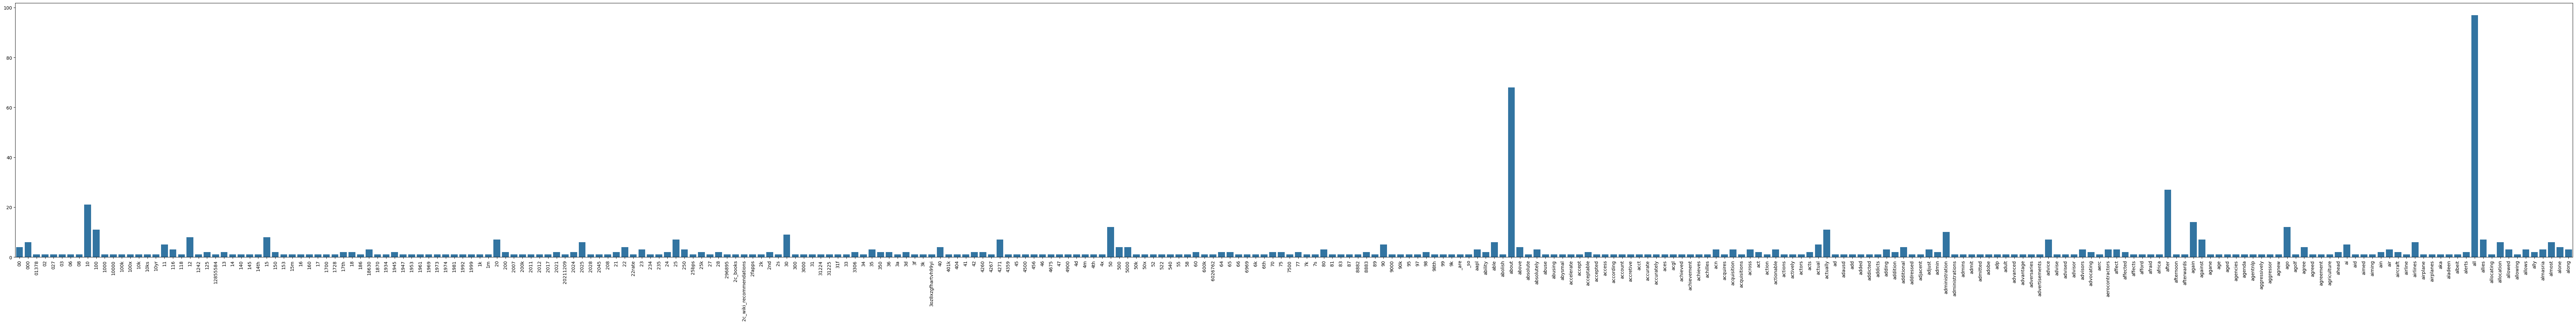

In [39]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

term_frequencies[0]

plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90)

In [40]:
# Answer here
import plotly.express as px

# Create an interactive bar plot for the first 100 terms
terms = count_vect.get_feature_names_out()[:100]
freqs = term_frequencies[:100]

fig = px.bar(x=terms, y=freqs, labels={'x': 'Term', 'y': 'Frequency'}, title='Term Frequencies (First 100 Terms)')
fig.update_layout(xaxis_tickangle=-90, width=1000, height=300)
fig.show()

In [41]:
top_n = 30
freq_series = pd.Series(term_frequencies, index=count_vect.get_feature_names_out()).sort_values(ascending=False)
top_terms = freq_series.iloc[:top_n]

fig = px.bar(
    x=top_terms.index,
    y=top_terms.values,
    labels={"x": "Term", "y": "Frequency"},
    title=f"Top {top_n} terms by document frequency",
)
fig.update_layout(xaxis_tickangle=75, width=900, height=400)
fig.show()


In [42]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

C:\Users\dmatz\AppData\Local\Temp\ipykernel_2628\2166548998.py:4: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



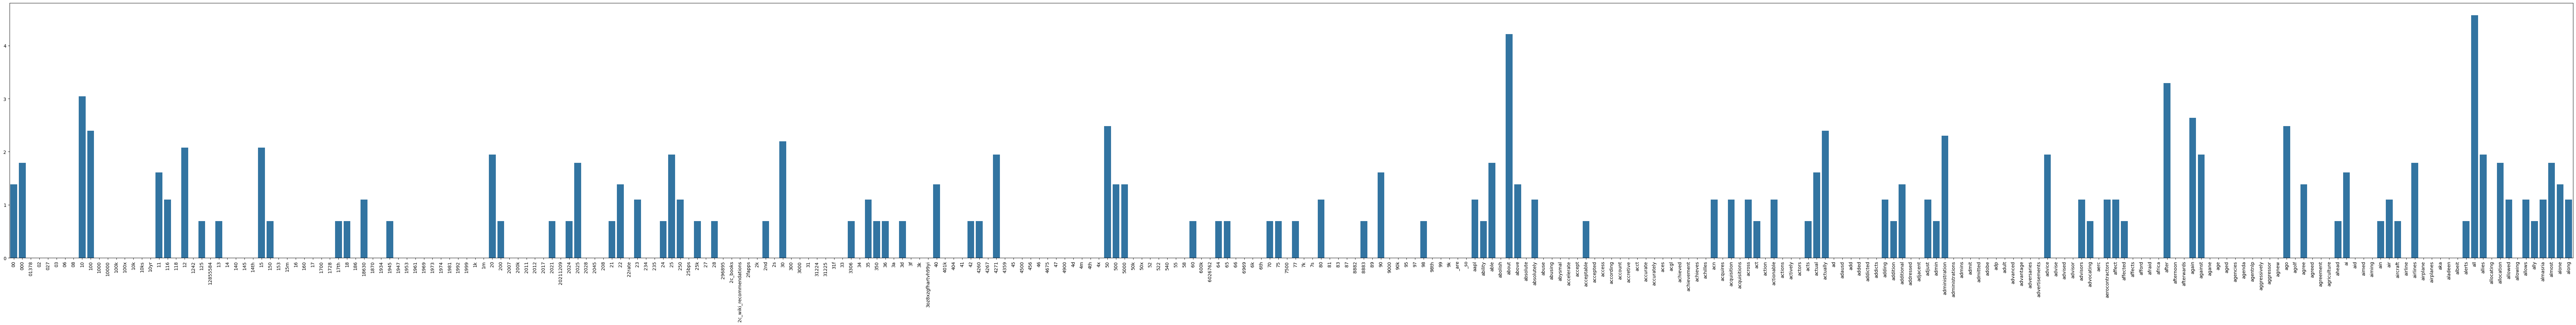

In [43]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

In [44]:
top_k = 30
log_freq_series = pd.Series(term_frequencies_log, index=count_vect.get_feature_names_out())

top_terms_df = (
    log_freq_series.sort_values(ascending=False)
    .head(top_k)
    .rename_axis("term")
    .reset_index(name="log_freq")
)

fig = px.bar(
    top_terms_df,
    x="term",
    y="log_freq",
    text="log_freq",
    title=f"Highest {top_k} terms by log frequency",
    labels={"term": "Token", "log_freq": "log count"},
)
fig.update_traces(marker_color="#4C78A8", texttemplate="%{text:.2f}", textposition="outside")
fig.update_layout(xaxis_tickangle=60, width=920, height=420, margin=dict(l=30, r=20, t=60, b=120))
fig.show()


New visaizations:

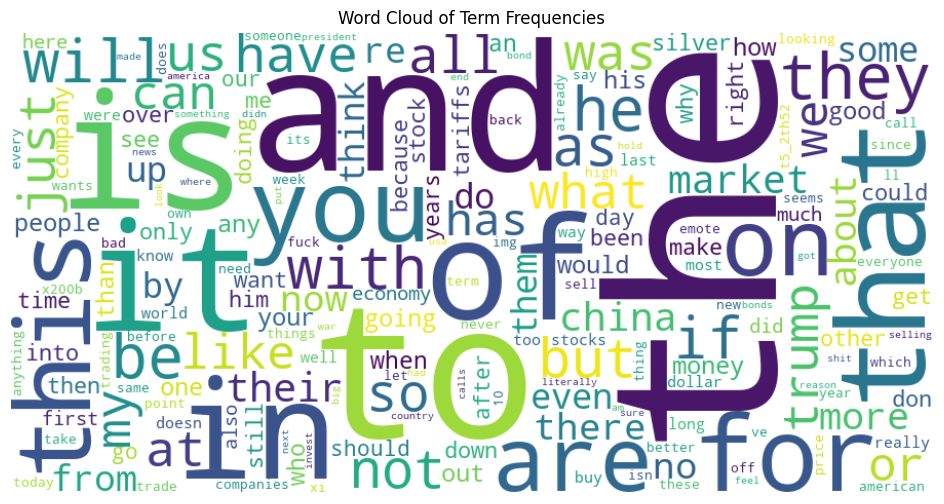

In [49]:
from wordcloud import WordCloud

# Build a word cloud from the global term frequency series
wordcloud = WordCloud(
    width=900,
    height=450,
    background_color="white",
    colormap="viridis"
).generate_from_frequencies(freq_series.to_dict())

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Term Frequencies")
plt.show()

In [81]:
import plotly.express as px

sentiment_names = {-1.0: "Negative", 0.0: "Neutral", 1.0: "Positive"}
label_counts = (
    sentiments["label"].map(sentiment_names).value_counts().reindex(["Negative", "Neutral", "Positive"])
)
label_counts = label_counts.dropna().rename_axis("sentiment").reset_index(name="count")

pie_fig = px.pie(
    label_counts,
    names="sentiment",
    values="count",
    title="Sentiment distribution (pie chart)",
    color="sentiment",
    color_discrete_map={"Negative": "#EF553B", "Neutral": "#636EFA", "Positive": "#00CC96"},
)
pie_fig.update_traces(textposition="inside", textinfo="percent+label")
pie_fig.update_layout(showlegend=False)
pie_fig.show()

# Phase 2

In [50]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

#Create separate DataFrames for each category
categories = sentiments['type'].unique()  # Get unique category labels
category_dfs = {}  # Dictionary to store DataFrames for each category

for category in categories:
    # Filter the original DataFrame by category
    category_dfs[category] = sentiments[sentiments['type'] == category].copy()

# Function to create term-document frequency DataFrame for each category
def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    X_counts = count_vect.fit_transform(df['text'])  # Transform the text data into word counts
    
    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    
    return term_document_df

# Create term-document frequency DataFrames for each category
filt_term_document_dfs = {}  # Dictionary to store term-document DataFrames for each category

for category in categories:
    filt_term_document_dfs[category] = create_term_document_df(category_dfs[category])

In [51]:
# Display the filtered DataFrame for one of the categories, feel free to change the number in the vector
category_number=1 #You can change it from 0 to 3
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
filt_term_document_dfs[categories[category_number]]

Filtered Term-Document Frequency DataFrame for Category post:


,01378,08,10,11,116,12,13,15m,16,18,...,yahoo,year,years,yet,yield,yields,you,young,your,zone
0,0,0,0,0,3,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,5,0,4,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


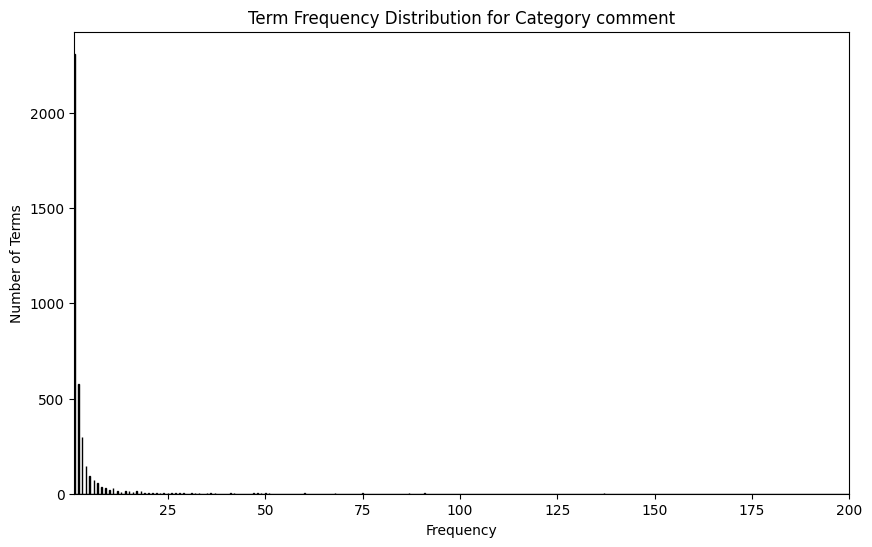

In [52]:
 # Sum over all documents to get total frequency for each word
category_number=0 #You can change it from 0 to 3
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()
 
# Visualize the frequency distribution
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=5000, color='blue', edgecolor='black')
plt.title(f'Term Frequency Distribution for Category {categories[category_number]}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 200)
plt.show()

In [53]:
category_number=0 #You can change it from 0 to 1
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in descending order
sorted_indices = np.argsort(word_counts)[::-1]  # Get indices of sorted frequencies
sorted_counts = np.sort(word_counts)[::-1]  # Sort frequencies in descending order

# Calculate the index corresponding to the top 5% most frequent terms
total_terms = len(sorted_counts)
top_5_percent_index = int(0.05 * total_terms)

# Get the indices of the top 5% most frequent terms
top_5_percent_indices = sorted_indices[:top_5_percent_index]

# Filter terms that belong to the top 5% based on their rank
filtered_words = [filt_term_document_dfs[categories[category_number]].iloc[:, i].name for i in top_5_percent_indices]

print(f"Category: {categories[category_number]}")
print(f"Number of terms in top 5%: {top_5_percent_index}")
print(f"Filtered terms: {filtered_words}")

Category: comment
Number of terms in top 5%: 194
Filtered terms: ['the', 'to', 'and', 'is', 'it', 'of', 'in', 'that', 'this', 'you', 'for', 'on', 'they', 'are', 'he', 'will', 'be', 'if', 'not', 'but', 'with', 'us', 'so', 'as', 'all', 'trump', 'was', 'have', 'at', 'just', 'what', 'my', 'we', 'can', 'china', 'or', 'like', 'has', 'now', 'there', 'no', 'about', 'market', 'more', 'their', 'do', 'people', 're', 'his', 'up', 'think', 'even', 'how', 'them', 'from', 'one', 'by', 'going', 'money', 'when', 'would', 'good', 'your', 'any', 'who', 'than', 'tariffs', 'an', 'out', 'some', 'him', 'why', 'see', 'only', 'been', 'other', 'get', 'make', 'then', 'over', 'time', 'don', 'want', 'doing', 'because', 'still', 'silver', 'down', 'me', 'right', 'go', 'economy', 'day', 'years', 'could', 'after', 'did', 'our', 'into', 'buy', 'much', 'should', 'doesn', 'really', 'way', 'here', 'last', 'too', 'world', 'also', 'long', 'first', 'dollar', 'know', 'back', 'most', 'trade', 'year', '10', 'everyone', 'well', 

In [64]:
category_number=0 #You can change it from 0 to 1
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in descending order
sorted_indices = np.argsort(word_counts)[::-1]  # Get indices of sorted frequencies
sorted_counts = np.sort(word_counts)[::-1]  # Sort frequencies in descending order

# Calculate the index corresponding to the top 5% most frequent terms
total_terms = len(sorted_counts)
top_5_percent_index = int(0.05 * total_terms)

# Get the indices of the top 5% most frequent terms
top_5_percent_indices = sorted_indices[:top_5_percent_index]

# Filter terms that belong to the top 5% based on their rank
filtered_words = [filt_term_document_dfs[categories[category_number]].iloc[:, i].name for i in top_5_percent_indices]

print(f"Category: {categories[category_number]}")
print(f"Number of terms in top 5%: {top_5_percent_index}")
print(f"Filtered terms: {filtered_words}")

Category: comment
Number of terms in top 5%: 194
Filtered terms: ['the', 'to', 'and', 'is', 'it', 'of', 'in', 'that', 'this', 'you', 'for', 'on', 'they', 'are', 'he', 'will', 'be', 'if', 'not', 'but', 'with', 'us', 'so', 'as', 'all', 'trump', 'was', 'have', 'at', 'just', 'what', 'my', 'we', 'can', 'china', 'or', 'like', 'has', 'now', 'there', 'no', 'about', 'market', 'more', 'their', 'do', 'people', 're', 'his', 'up', 'think', 'even', 'how', 'them', 'from', 'one', 'by', 'going', 'money', 'when', 'would', 'good', 'your', 'any', 'who', 'than', 'tariffs', 'an', 'out', 'some', 'him', 'why', 'see', 'only', 'been', 'other', 'get', 'make', 'then', 'over', 'time', 'don', 'want', 'doing', 'because', 'still', 'silver', 'down', 'me', 'right', 'go', 'economy', 'day', 'years', 'could', 'after', 'did', 'our', 'into', 'buy', 'much', 'should', 'doesn', 'really', 'way', 'here', 'last', 'too', 'world', 'also', 'long', 'first', 'dollar', 'know', 'back', 'most', 'trade', 'year', '10', 'everyone', 'well', 

In [54]:
#Skipped the exploration part of the most/least frequent words, as I continue with processing the dataset into pattern recognition

category_number=0 #You can change it from 0 to 1

# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)
    
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    print(f'Bottom {bottom_percent*100}% words: \n{sorted_words.head(bottom_n)}') #Here we print which words correspond to the bottom percentage we filter
    print(f'Top {top_percent*100}% words: \n{sorted_words.tail(top_n)}') #Here we print which words correspond to the top percentage we filter
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)

# Apply the filtering function to each category
term_document_dfs = {}

for category in categories:
    print(f'\nFor category {category} we filter the following words:')
    term_document_dfs[category] = filter_top_bottom_words_by_sum(filt_term_document_dfs[category])

# Example: Display the filtered DataFrame for one of the categories
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
term_document_dfs[categories[category_number]]


For category comment we filter the following words:
Bottom 1.0% words: 
100x        1
100k        1
10000       1
1000        1
yelling     1
yamana      1
1700        1
17          1
160         1
153         1
14th        1
145         1
140         1
mutual      1
mute        1
muslims     1
wutang      1
ws          1
1934        1
1870        1
186         1
18          1
1728        1
yikes       1
yield       1
14          1
13          1
12855584    1
zsil        1
1242        1
young       1
10k         1
208         1
2045        1
2028        1
2024        1
20211209    1
2012        1
dtype: int64
Top 5.0% words: 
big         13
trading     14
got         14
didn        14
again       14
          ... 
it         321
is         359
and        393
to         501
the        773
Length: 194, dtype: int64

For category post we filter the following words:
Bottom 1.0% words: 
3a        1
3f        1
456       1
58        1
2017      1
2024      1
2025      1
22        1
adausd  

,00,000,02,027,03,06,100,10ks,10yr,11,...,yippee,yo,yours,yourself,yourselves,youtube,yoyo,yup,zero,zgld
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
777,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
778,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
779,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
from PAMI.extras.convert.DF2DB import DF2DB            

# Loop through the dictionary of term-document DataFrames
for category in term_document_dfs:
    # Replace dots with underscores in the category name to avoid errors in the file creation
    category_safe = category.replace('.', '_')
    
    # Create the DenseFormatDF object and convert to a transactional database
    obj = DF2DB(term_document_dfs[category])           
        
    obj.convert2TransactionalDatabase(f'td_freq_db_{category_safe}.csv', '>=', 1)

In [56]:

import builtins

_orig_open = open

def safe_open(*args, **kwargs):
    if len(args) > 0 and isinstance(args[0], str) and args[0].endswith('.csv'):
        kwargs['encoding'] = 'latin-1'   # Force Latin-1
        kwargs['errors'] = 'ignore'      # Ignore bad characters
    return _orig_open(*args, **kwargs)


builtins.open = safe_open

Database size (total no of transactions) : 767
Number of items : 3650
Minimum Transaction Size : 1
Average Transaction Size : 9.272490221642764
Maximum Transaction Size : 191
Standard Deviation Transaction Size : 13.05100062819827
Variance in Transaction Sizes : 170.55097851654918
Sparsity : 0.9974595917200979


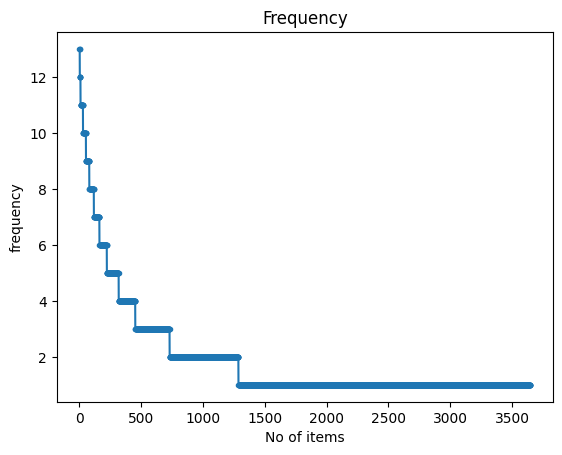

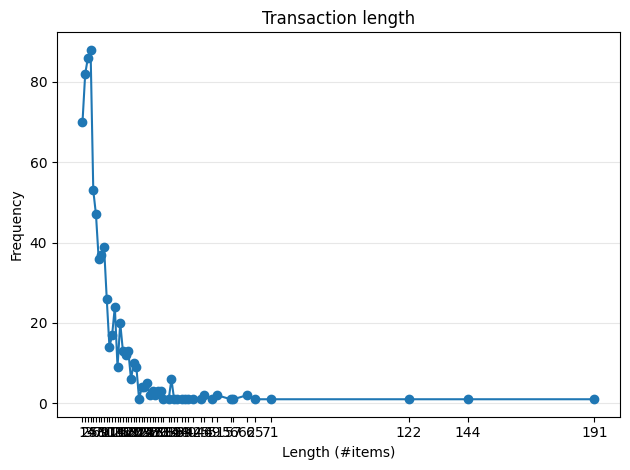

In [57]:
# Demonstration one Transactional DB

from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_comment.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

In [58]:

from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj1 = alg.FPGrowth(iFile='td_freq_db_comment.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_comment= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_comment))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 80
Runtime: 0.005261421203613281


In [59]:
obj1.save('freq_patterns_comment_minSup9.txt') #save the patterns
frequentPatternsDF_comment

,Patterns,Support
0,lot,9
1,americans,9
2,many,9
3,rates,9
4,wrong,9
...,...,...
75,ago,12
76,news,12
77,pretty,13
78,everything,13


In [60]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj3 = alg.FPGrowth(iFile='td_freq_db_post.csv', minSup=minSup)
obj3.mine()
frequentPatternsDF_post= obj3.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_post))) #print the total number of patterns
print('Runtime: ' + str(obj3.getRuntime())) #measure the runtime

obj3.save('freq_patterns_post_minSup9.txt') #save the patterns
frequentPatternsDF_post

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 0
Runtime: 0.024904727935791016


,Patterns,Support


In [61]:
import pandas as pd

#We group together all of the dataframes related to our found patterns
dfs = [frequentPatternsDF_post, frequentPatternsDF_comment]


# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(df) for df in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

      Patterns Support
79       least      13
78  everything      13
77      pretty      13
74     without      12
72        said      12
..         ...     ...
23        love       9
24        yeah       9
25      please       9
26        seen       9
0          lot       9

[80 rows x 2 columns]
Number of patterns discarded: 0


In [62]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
tdm = count_vect.fit_transform(sentiments['text'])  # sentiments['text'] contains your text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
sentiments['tokenized_text'] = sentiments['text'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=sentiments.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = sentiments['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(tdm.toarray(), columns=terms, index=sentiments.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df

,00,000,01378,02,027,03,06,08,10,100,...,stop,higher,mean,thanks,done,love,yeah,please,seen,lot
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
842,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
843,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
845,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
# Focus mining on the comment-only transaction database
from PAMI.frequentPattern.topk import FAE as TopKFAE
from PAMI.frequentPattern.maximal import MaxFPGrowth as MaxFP

comment_db_path = "td_freq_db_comment.csv"
separator = "\t"

topk_values = (500, 1000, 1200)
for k_value in topk_values:
    print(f"Running Top-{k_value} mining on comments")
    topk_job = TopKFAE.FAE(iFile=comment_db_path, k=k_value, sep=separator)
    topk_job.mine()
    topk_job.save(outFile="frequentPatternsMinSupCount100_Comment.txt")
    topk_df = topk_job.getPatternsAsDataFrame()
    print(f"Pattern count: {len(topk_df)}")
    print(f"Runtime: {topk_job.getRuntime()}")

min_support_values = (3, 6, 9)
for support in min_support_values:
    print(f"Extracting maximal patterns with minSup count {support}")
    maxfp_job = MaxFP.MaxFPGrowth(iFile=comment_db_path, minSup=support, sep=separator)
    maxfp_job.mine()
    maxfp_job.save(f"maximalFrequentPatternsAtMinSupCount_Comment{support}.txt")
    maxfp_df = maxfp_job.getPatternsAsDataFrame()
    print(f"Pattern count: {len(maxfp_df)}")
    print(f"Runtime: {maxfp_job.getRuntime()}")


Running Top-500 mining on comments
 TopK frequent patterns were successfully generated using FAE algorithm.
Pattern count: 500
Runtime: 0.13622713088989258
Running Top-1000 mining on comments
 TopK frequent patterns were successfully generated using FAE algorithm.
Pattern count: 1000
Runtime: 0.7223255634307861
Running Top-1200 mining on comments
 TopK frequent patterns were successfully generated using FAE algorithm.
Pattern count: 1200
Runtime: 1.1260037422180176
Extracting maximal patterns with minSup count 3
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Pattern count: 703
Runtime: 0.03322768211364746
Extracting maximal patterns with minSup count 6
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Pattern count: 222
Runtime: 0.023818016052246094
Extracting maximal patterns with minSup count 9
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Pattern count: 80
Runtime: 0.01099133

In [67]:
#Applying dimensionality reduction with only the document-term frequency data
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

#This might take a couple of minutes to execute
# Apply PCA, t-SNE, and UMAP to the data
X_pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values)
X_tsne_tdm = TSNE(n_components=2).fit_transform(tdm_df.values)
X_umap_tdm = umap.UMAP(n_components=2).fit_transform(tdm_df.values)

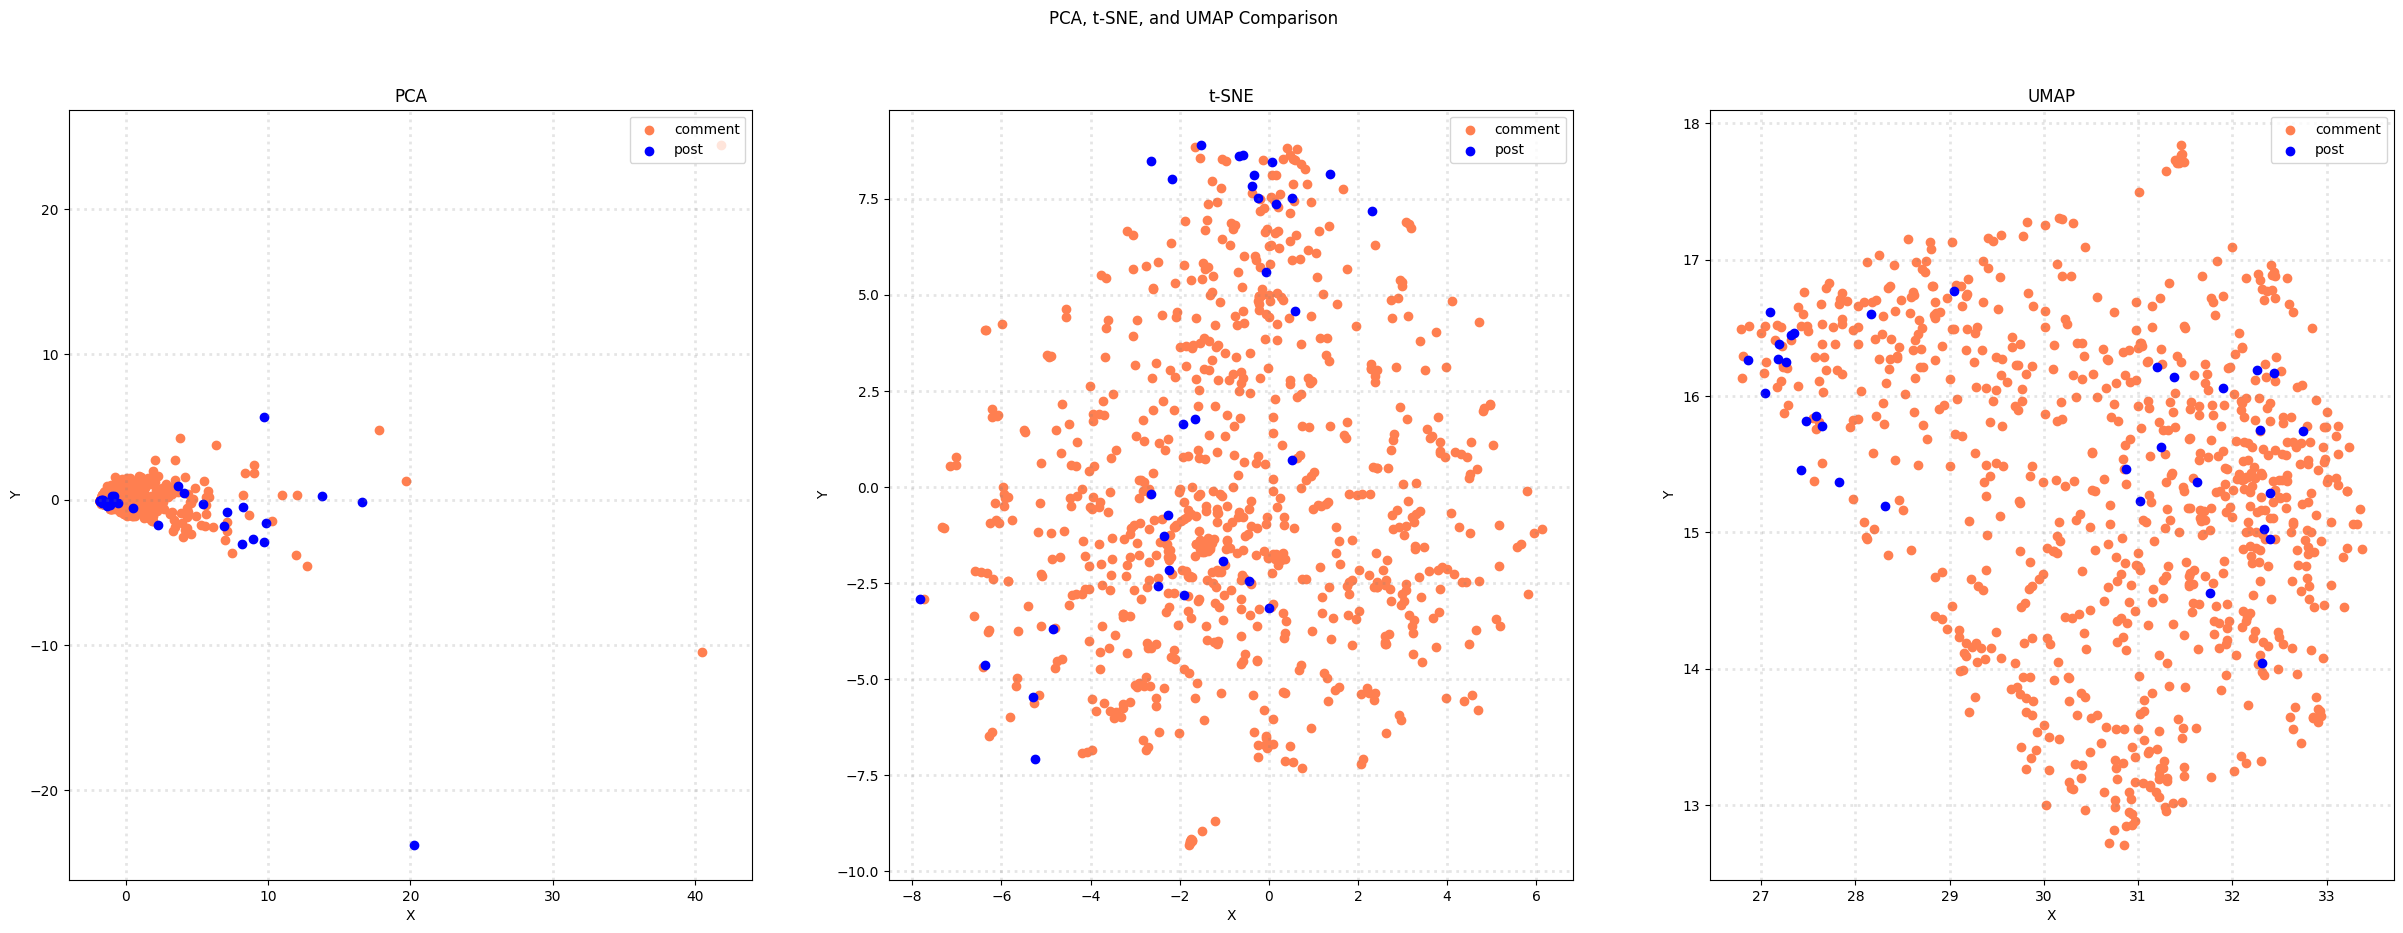

In [68]:

# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
categories = sentiments['type'].unique()

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[sentiments['type'] == category].T[0]
        ys = X_reduced[sentiments['type'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_tdm, 'PCA')
plot_scatter(axes[1], X_tsne_tdm, 't-SNE')
plot_scatter(axes[2], X_umap_tdm, 'UMAP')

plt.show()

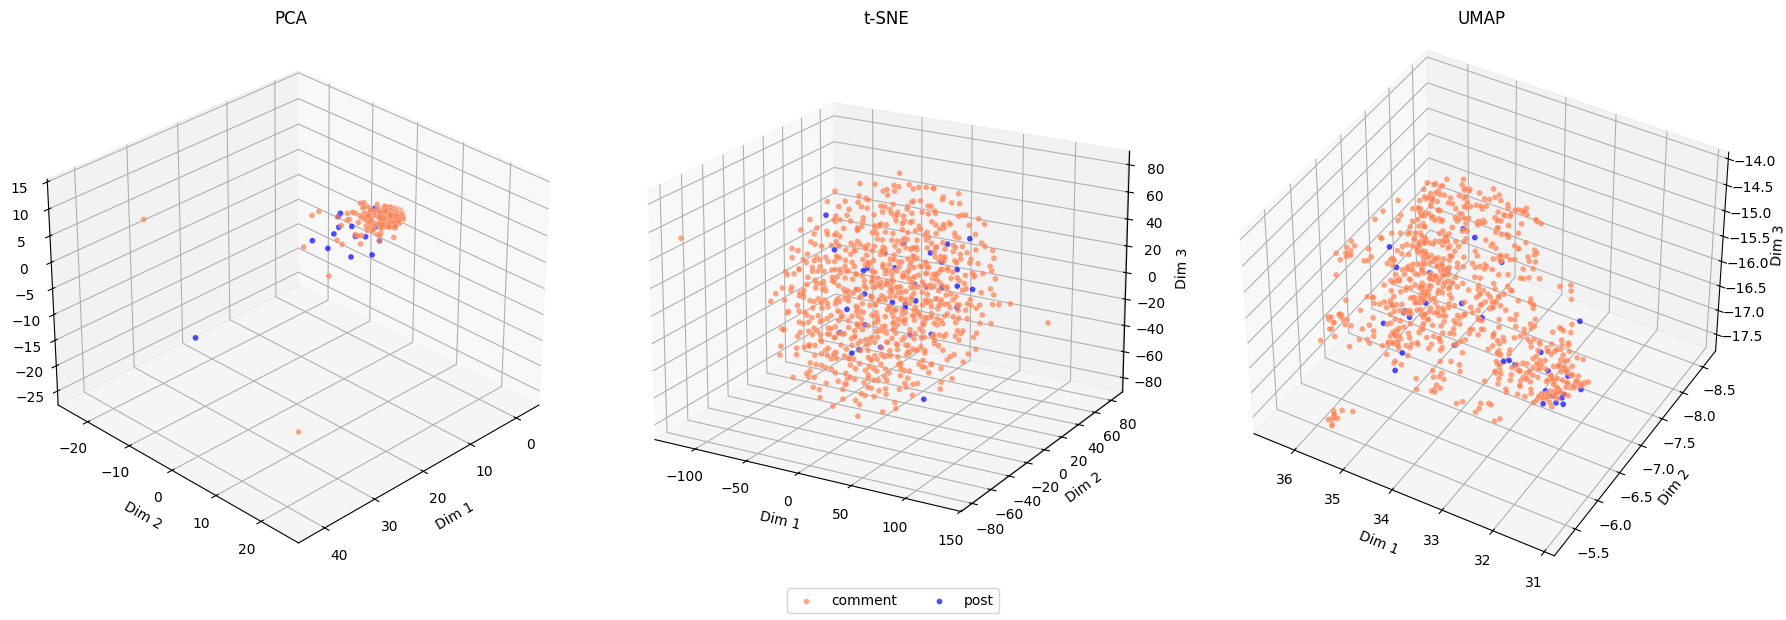

In [70]:
X_pca_aug = PCA(n_components=3).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=3).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=3).fit_transform(augmented_df.values)

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


col = ['coral', 'blue', 'black', 'orange']
categories = sentiments['type'].unique()

fig = plt.figure(figsize=(18, 6))
titles = ['PCA', 't-SNE', 'UMAP']
embeddings = [X_pca_aug, X_tsne_aug, X_umap_aug]

# different camera angles for each subplot (elev, azim)
views = [(30, 45), (20, -60), (40, 120)]

for i, (emb, title, view) in enumerate(zip(embeddings, titles, views), start=1):
    ax = fig.add_subplot(1, 3, i, projection='3d')
    for c, category in zip(col, categories):
        mask = (sentiments['type'] == category).values
        pts = emb[mask]
        ax.scatter(pts[:, 0], pts[:, 1], pts[:, 2],
                   c=c, label=category, s=18, alpha=0.7, edgecolors='w', linewidths=0.2)
    ax.set_title(title)
    ax.set_xlabel('Dim 1')
    ax.set_ylabel('Dim 2')
    ax.set_zlabel('Dim 3')
    ax.view_init(elev=view[0], azim=view[1])
    ax.grid(True, linestyle=':', alpha=0.3)

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=len(categories), frameon=True)
plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.show()

In [71]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

mlb = preprocessing.LabelBinarizer()
mlb.fit(sentiments['type'])
sentiments['bin_type'] = mlb.transform(sentiments['type']).tolist()
sentiments[0:9]

,type,title,author,text,sentiment,label,unigrams,tokenized_text,bin_type
0,comment,Retardation is on the menu boys! WSB is so back,StickyTip420,Calls on retards,-1.0,-1.0,"[Calls, on, retards]","{on, retards, Calls}",[0]
1,comment,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,Stunt as in like why did they even make a big ...,1.0,0.0,"[Stunt, as, in, like, why, did, they, even, ma...","{it, a, ever, as, make, in, starting, big, Stu...",[0]
2,comment,How do you feel about a sitting president maki...,Btankersly66,Seeing lots of red in the ticker.,0.0,0.0,"[Seeing, lots, of, red, in, the, ticker, .]","{red, ticker., in, of, lots, Seeing, the}",[0]
3,post,Who knows more? $VMAR,emiljenfn,Vision Marine Technologies Inc. is rewriting t...,1.0,1.0,"[Vision, Marine, Technologies, Inc., is, rewri...","{Their, for, in, Power, Marine, mph, the, on, ...",[1]
4,comment,The Trump administration is begging Xi Jinping...,Just-Big6411,He didn’t say thank you.,0.0,-1.0,"[He, didn, ’, t, say, thank, you, .]","{thank, didn’t, He, say, you.}",[0]
5,comment,Weekend Discussion Thread for the Weekend of A...,PolarNimbus,"Hoping to ejaculate in wet warm puss tonight, ...",1.0,0.0,"[Hoping, to, ejaculate, in, wet, warm, puss, t...","{to, warm, tonight,, me, puss, in, wet, ejacul...",[0]
6,comment,Is the market in complete denial right now?,stoniey84,Trump will respond to china increasing their t...,-1.0,-1.0,"[Trump, will, respond, to, china, increasing, ...","{next, it, companies, adjust, A, brutal...., l...",[0]
7,comment,Retardation is on the menu boys! WSB is so back,OSRSkarma,Confirmed not a trap. Its been like this for p...,1.0,0.0,"[Confirmed, not, a, trap, ., Its, been, like, ...","{it, Confirmed, a, we, for, been, months,, of,...",[0]
8,comment,"It's fucking awful seeing the ""Silver"" misinfo...",Blondbox,Am I the only one seeing the cup & handle brea...,1.0,1.0,"[Am, I, the, only, one, seeing, the, cup, &, h...","{Follow, folks., a, high?, new, 52, handle, he...",[0]


In [72]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = sentiments.iloc[10]
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = sentiments.iloc[80]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = sentiments.iloc[120]
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3)

In [73]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [74]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.144338
Cosine Similarity using count bw 2 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


C:\Users\dmatz\AppData\Local\Temp\ipykernel_2628\452772485.py:13: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\dmatz\AppData\Local\Temp\ipykernel_2628\452772485.py:14: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\dmatz\AppData\Local\Temp\ipykernel_2628\452772485.py:15: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\dmatz\AppData\Local\Temp\ipykernel_2628\452772485.py:17: DeprecationWarning:

Conversion of an array with ndim > 0 to a scal

In [75]:
#Model with only the document-term frequency data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

sentiments['category'] = sentiments['type'].apply(lambda x: 0 if x == 'post' else 1)

# Create a mapping from numerical labels to category names
category_mapping = dict(sentiments[['category', 'type']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, sentiments['category'], test_size=0.3, random_state=42)

In [76]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.9672131147540983

Classification Report:
               precision    recall  f1-score   support

        post     0.5556    0.5556    0.5556         9
     comment     0.9830    0.9830    0.9830       235

    accuracy                         0.9672       244
   macro avg     0.7693    0.7693    0.7693       244
weighted avg     0.9672    0.9672    0.9672       244



In [77]:
# map numerical labels to category names
category_mapping = dict(sentiments[['category', 'type']].drop_duplicates().values)

# numerical labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(augmented_df, sentiments['category'], test_size=0.3, random_state=42)

# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.9672131147540983

Classification Report:
               precision    recall  f1-score   support

        post     0.5556    0.5556    0.5556         9
     comment     0.9830    0.9830    0.9830       235

    accuracy                         0.9672       244
   macro avg     0.7693    0.7693    0.7693       244
weighted avg     0.9672    0.9672    0.9672       244



In [78]:
# Decision Tree with only the document-term frequency data
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Split the data (already done above, but shown here for clarity)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, sentiments['category'], test_size=0.3, random_state=42)

# Train Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = dt_classifier.predict(X_test)
print("Decision Tree Accuracy (TDM):", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt, target_names=target_names, digits=4))

Decision Tree Accuracy (TDM): 0.9631147540983607

Classification Report:
               precision    recall  f1-score   support

        post     0.5000    0.5556    0.5263         9
     comment     0.9829    0.9787    0.9808       235

    accuracy                         0.9631       244
   macro avg     0.7415    0.7671    0.7536       244
weighted avg     0.9651    0.9631    0.9640       244



In [79]:
#Answer

# Split the data (already done above, but shown here for clarity)
X_train, X_test, y_train, y_test = train_test_split(augmented_df, sentiments['category'], test_size=0.3, random_state=42)

# Train Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = dt_classifier.predict(X_test)
print("Decision Tree Accuracy (TDM):", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt, target_names=target_names, digits=4))

Decision Tree Accuracy (TDM): 0.9508196721311475

Classification Report:
               precision    recall  f1-score   support

        post     0.3846    0.5556    0.4545         9
     comment     0.9827    0.9660    0.9742       235

    accuracy                         0.9508       244
   macro avg     0.6836    0.7608    0.7144       244
weighted avg     0.9606    0.9508    0.9551       244



In [80]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.metrics import accuracy_score, classification_report
from scipy.sparse import hstack, csr_matrix
import numpy as np
import pandas as pd

# Ensure target exists
y = sentiments['category']  # 0 = post, 1 = comment

# TF-IDF matrix
tfidf_vect = TfidfVectorizer(max_features=20000, min_df=2)  # adjust params if needed
X_tfidf = tfidf_vect.fit_transform(sentiments['text'])


X_counts = tdm  

X_pattern = csr_matrix(pattern_matrix.values)

# Helper to train & evaluate
def train_eval(model, X, y, desc):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n=== {desc} ===")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred, digits=4))

#Word frequencies -> MultinomialNB
train_eval(MultinomialNB(), X_counts, y, "Counts (word frequency) + MultinomialNB")

X_counts_aug = hstack([X_counts, X_pattern])
train_eval(MultinomialNB(), X_counts_aug, y, "Counts + Patterns (augmented) + MultinomialNB")

train_eval(ComplementNB(), X_tfidf, y, "TF-IDF + ComplementNB")

X_tfidf_aug = hstack([X_tfidf, X_pattern])
train_eval(ComplementNB(), X_tfidf_aug, y, "TF-IDF + Patterns (augmented) + ComplementNB")



=== Counts (word frequency) + MultinomialNB ===
Accuracy: 0.9508196721311475
              precision    recall  f1-score   support

           0     0.4167    0.5000    0.4545        10
           1     0.9784    0.9701    0.9742       234

    accuracy                         0.9508       244
   macro avg     0.6976    0.7350    0.7144       244
weighted avg     0.9554    0.9508    0.9529       244


=== Counts + Patterns (augmented) + MultinomialNB ===
Accuracy: 0.9590163934426229
              precision    recall  f1-score   support

           0     0.5000    0.6000    0.5455        10
           1     0.9828    0.9744    0.9785       234

    accuracy                         0.9590       244
   macro avg     0.7414    0.7872    0.7620       244
weighted avg     0.9630    0.9590    0.9608       244


=== TF-IDF + ComplementNB ===
Accuracy: 0.8770491803278688
              precision    recall  f1-score   support

           0     0.1154    0.3000    0.1667        10
           1   

## What’s not working well

- Token cleanup is too light: noisy artifacts (URLs, emails, raw numbers, stray punctuation, weird concatenations) are still present and bleed into features.
- Case and punctuation inconsistencies inside transactions inflate the vocabulary (e.g., “Stock”, “stock,” and “stock” treated as different), which slows pattern mining and dilutes support.
- Feature extraction isn’t constrained: no min_df/max_df, no stopword removal, no n-grams, and no feature cap — leading to a large, sparse, noisy space.
- No intermediate saves/checkpoints, so reruns require executing the entire notebook from the top.
- Plotting does redundant work (recomputes masks/slices repeatedly), adding unnecessary overhead.

## What to change (actionable)

- Normalize early and consistently:
  - Lowercase all text.
  - Strip or normalize punctuation; remove/replace URLs and emails with placeholders.
  - Map numbers to a single token (e.g., “<num>”) and collapse repeated whitespace.
- Tame the vocabulary and keep it sparse:
  - Apply min_df (e.g., 3–5 or an absolute count) and max_df (e.g., 0.9–0.95), remove stopwords, and consider ngram_range=(1, 2).
  - Cap max_features to a reasonable size (e.g., 20k–50k) for speed and stability.
  - Keep matrices sparse end-to-end and avoid accidental densification.
- Reuse work in visualizations:
  - Precompute boolean masks or index arrays once and reuse across plots.
- Prep transactions before mining:
  - Map tokens to stable integer IDs, lowercase, sort within each transaction, drop duplicates in-transaction, and store as compact sparse int arrays.
  - Remove ultra-rare items globally to reduce FP-growth branching.
- Add persistence and reproducibility:
  - Save cleaned text, vectorizers, and matrices (CSV/NPZ/Joblib) so you can restart mid-pipeline without recomputing.
  - Fix random seeds and record key parameters (min_df, max_df, ngram_range, etc.) for consistent runs.